Hardware execution time:  0.005373477935791016
2.0 -3.141693115234375
2.829864501953125 -2.355865478515625
2.00006103515625 -1.567840576171875
2.82568359375 0.788482666015625
2.0020751953125 -1.569793701171875
6.3114013671875 0.324554443359375
5.993988037109375 -3.136932373046875
0.00811767578125 0.000457763671875
10.014007568359375 -3.138641357421875
6.319000244140625 -1.247711181640625
4.44451904296875 -0.461334228515625
5.668304443359375 -0.779449462890625
8.276702880859375 1.331939697265625
16.4879150390625 2.9036865234375
6.000091552734375 -1.559722900390625
6.329498291015625 2.82940673828125
10.83538818359375 -1.185577392578125
8.978179931640625 1.115997314453125
2.032318115234375 -3.114776611328125
8.032073974609375 0.013946533203125
15.704071044921875 2.45599365234375
10.20684814453125 -1.752716064453125
8.33050537109375 1.337677001953125
16.024139404296875 -1.555145263671875
14.00347900390625 0.011688232421875
10.225860595703125 2.96148681640625
12.24224853515625 -0.1520690917

11.262603759765625 2.95947265625
12.67828369140625 -0.649078369140625
12.70538330078125 -2.867462158203125
19.917724609375 -1.625213623046875
11.95355224609375 0.592803955078125
4.009063720703125 -2.559478759765625
8.00299072265625 0.581146240234375
15.97625732421875 2.1697998046875
11.37811279296875 -1.757720947265625
4.012420654296875 2.16082763671875
14.28204345703125 -1.563385009765625
12.658935546875 0.283843994140625
8.02557373046875 2.18011474609375
12.793060302734375 -2.205780029296875
5.6990966796875 1.359100341796875
12.031646728515625 -2.532257080078125
5.75335693359375 -0.170928955078125
12.78912353515625 -2.866180419921875
8.03863525390625 -0.974578857421875
12.719268798828125 0.934661865234375
14.4197998046875 2.77630615234375
4.056182861328125 -0.911468505859375
11.475555419921875 2.95782470703125
16.02392578125 -0.947845458984375
7.9986572265625 0.630340576171875
4.059295654296875 -2.486114501953125
12.1097412109375 0.619659423828125
20.06939697265625 2.8359375
12.53082

8.003204345703125 0.869171142578125
15.976043701171875 2.45782470703125
11.37823486328125 -1.469573974609375
4.01220703125 2.44866943359375
14.282012939453125 -1.275360107421875
12.659027099609375 0.571868896484375
8.025604248046875 2.46820068359375
12.793121337890625 -1.917816162109375
5.699127197265625 1.6470947265625
12.031707763671875 -2.244171142578125
5.753387451171875 0.117034912109375
12.78900146484375 -2.578521728515625
8.03863525390625 -0.686370849609375
12.719482421875 1.222686767578125
14.419921875 3.06427001953125
4.05645751953125 -0.623382568359375
11.4754638671875 -3.037384033203125
16.0240478515625 -0.659637451171875
7.99859619140625 0.918243408203125
4.059417724609375 -2.198028564453125
12.1097412109375 0.907745361328125
20.069366455078125 3.123779296875
12.53094482421875 -1.905364990234375
12.700714111328125 2.16363525390625
11.318878173828125 -1.438140869140625
63.997467041015625 0.911651611328125
11.2628173828125 -3.003814697265625
12.6783447265625 -0.32913208007812

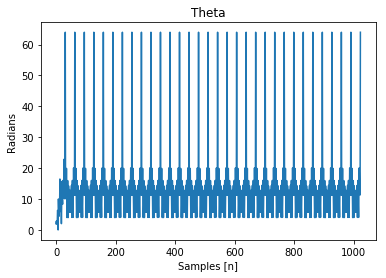

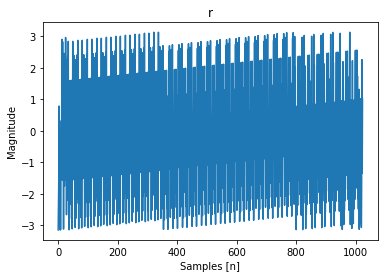

In [3]:
import time
from pynq import Overlay
import pynq.lib.dma
from pynq import Xlnk
import numpy as np
from pynq import MMIO
import random
import matplotlib.pyplot as plt

ol = Overlay('/home/xilinx/jupyter_notebooks/phase_detector_optimized/phase_detector_optimized.bit') # check this pathol.download() # this downloads your bitstream into FPGA
ol.download()

dma0 = ol.phase_detector.axi_dma_0 # first dma
dma1 = ol.phase_detector.axi_dma_1 # second dma
dma2 = ol.phase_detector.axi_dma_2 # third dma
dma3 = ol.phase_detector.axi_dma_3 # fourth dma

phase_detector_ip = MMIO(0x43c00000, 0x10000) # we got this address from 

xlnk = Xlnk()

length = 1024  # taken from hls code

in_buffer_i = xlnk.cma_array(shape=(length,), dtype=np.float32) # input buffer 1
in_buffer_q = xlnk.cma_array(shape=(length,), dtype=np.float32) # input buffer 2

out_buffer_r = xlnk.cma_array(shape=(length,), dtype=np.float32) # output buffer 1
out_buffer_theta = xlnk.cma_array(shape=(length,), dtype=np.float32) # output buffer 2

#########################
# my_file_handle=open("D:\\new_dir\\anotherfile.txt")
# my_file_handle.read()
# pull data from the dat input file
# 
# with open("/home/xilinx/jupyter_notebooks/phase_detector/input_i.dat", "r") as i_in;
# with open("/home/xilinx/jupyter_notebooks/phase_detector/input_q.dat", "r") as q_in;
#########################    

i_in = list()
q_in = list()

with open("/home/xilinx/jupyter_notebooks/phase_detector/input_i.dat", "r") as f_i:
    for line in f_i:
        i_in.append(float(line))
        #in_buffer_i.append(float(line))
with open("/home/xilinx/jupyter_notebooks/phase_detector/input_q.dat", "r") as f_q:
    for line in f_q:
        q_in.append(float(line))
        #in_buffer_q.append(float(line))


#input_file_i =open('/home/xilinx/jupyter_notebooks/phase_detector/input_i.dat')
# samples_i = random.sample(range(0, length), length)
#samples_i = input_file_i.read()
#np.copyto(in_buffer_i, samples_i)

#input_file_q =open('/home/xilinx/jupyter_notebooks/phase_detector/input_i=q.dat')
#samples_q = random.sample(range(0, length), length)
#samples_q = input_file_q.read()
#np.copyto(in_buffer_q, samples_q)

np.copyto(in_buffer_i, i_in)
np.copyto(in_buffer_q, q_in)

phase_detector_ip.write(0x10, length) # we got this address from vivado
t_start = time.time()

dma2.sendchannel.transfer(in_buffer_i)
dma3.sendchannel.transfer(in_buffer_q)  

dma0.sendchannel.transfer(in_buffer_i)  # input channel (write only)
dma1.sendchannel.transfer(in_buffer_q)  # input channel (write only)

dma2.recvchannel.transfer(out_buffer_theta)   # output channel
dma3.recvchannel.transfer(out_buffer_r)

dma2.sendchannel.wait()
dma3.sendchannel.wait()

dma0.sendchannel.wait()
dma1.sendchannel.wait()

dma2.recvchannel.wait()
dma3.recvchannel.wait()

t_stop = time.time()

in_buffer_i.close()
in_buffer_q.close()

out_buffer_r.close()
out_buffer_theta.close()
print('Hardware execution time: ', t_stop-t_start)
for i in range(0, length):
    print('{} {}'.format(out_buffer_theta[i], out_buffer_r[i]))
    
plt.plot(out_buffer_theta)
plt.title('Theta')
plt.xlabel('Samples [n]')
plt.ylabel('Radians')
plt.show()

plt.plot(out_buffer_r)
plt.title('r')
plt.xlabel('Samples [n]')
plt.ylabel('Magnitude')
plt.show()